# Discovering Correlated Frequent Patterns in Big Data Using CoMinePlus Algorithm

In this tutorial, we will discuss the first approach to find correlated patterns in big data using CoMinePlus algorithm.
 [__Basic approach:__](#basicApproach) Here, we present the steps to discover correlated patterns using a single minimum support value


***

## <a id='basicApproach'>Basic approach: Executing CoMinePlus on a single dataset at a particular minimum support value</a>

#### Step 0: install pami repository

In [2]:
!pip install -U pami

#### Step 1: Import the CoMinePlus algorithm

In [3]:
from PAMI.correlatedPattern.basic import CoMinePlus  as alg

#### Step 2: Specify the following input parameters

In [4]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv'
minAllConfCount=0.1
minimumSupportCount=100  #Users can also specify this constraint between 0 to 1.

seperator='\t'       

#### Step 3: Execute the CoMinePlus algorithm

In [5]:
obj = alg.CoMinePlus(iFile=inputFile, minSup=minimumSupportCount,  minAllConf=minAllConfCount ,sep=seperator)   #initialize
obj.startMine()            #Start the mining process

Correlated Frequent patterns were generated successfully using CorrelatedPatternGrowth algorithm


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [6]:
obj.save(outFile='correlatedPatternsMinSupCount100.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [7]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [8]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 5761


##### Step 5.2: Runtime consumed by the mining algorithm

In [9]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 10.369081258773804


In [10]:
##### Step 5.3: Total Memory consumed by the mining algorithm

In [11]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 384106496
Memory (USS): 363036672


***

# Advanced Tutorial on Implementing CoMinePlus Algorithm

In this tutorial, we will discuss the first approach to find correlated patterns in big data using CoMinePlus algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover correlated patterns using multiple minimum support values.

***

#### In this tutorial, we explain how the Correlated Pattern GrowthPlus (CoMinePlus) algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the CoMinePlus algorithm and pandas data frame

In [12]:
from PAMI.correlatedPattern.basic import CoMinePlus  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [18]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv'
seperator='\t'
minAllConfCount=0.1
minimumSupportCountList = [100, 150, 200, 250, 300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup',"minAllConf" , 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of CoMinePlus algorithm

#### Step 3: Execute the CoMinePlus algorithm using a for loop

In [20]:
algorithm = 'CoMinePlus'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.CoMinePlus(inputFile, minSup=minSupCount,minAllConf=minAllConfCount , sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount,minAllConfCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Correlated Frequent patterns were generated successfully using CorrelatedPatternGrowth algorithm
Correlated Frequent patterns were generated successfully using CorrelatedPatternGrowth algorithm
Correlated Frequent patterns were generated successfully using CorrelatedPatternGrowth algorithm
Correlated Frequent patterns were generated successfully using CorrelatedPatternGrowth algorithm
Correlated Frequent patterns were generated successfully using CorrelatedPatternGrowth algorithm


In [21]:
print(result)

    algorithm  minSup  minAllConf  patterns    runtime     memory
0  CoMinePlus     100         0.1      5761  10.375543  416874496
1  CoMinePlus     150         0.1      5413   9.948710  409272320
2  CoMinePlus     200         0.1      4819   9.948700  408731648
3  CoMinePlus     250         0.1      3939   9.878092  414826496
4  CoMinePlus     300         0.1      2951   9.900236  444923904


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [22]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

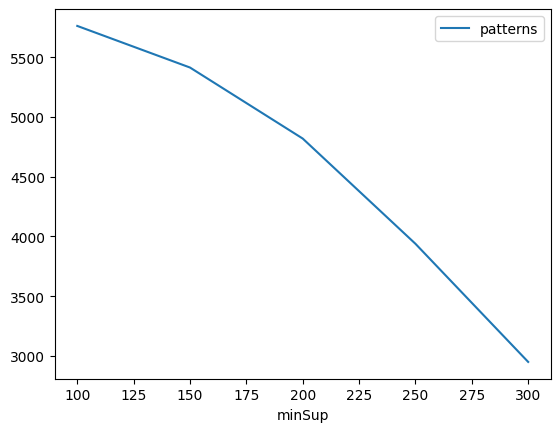

Graph for No Of Patterns is successfully generated!


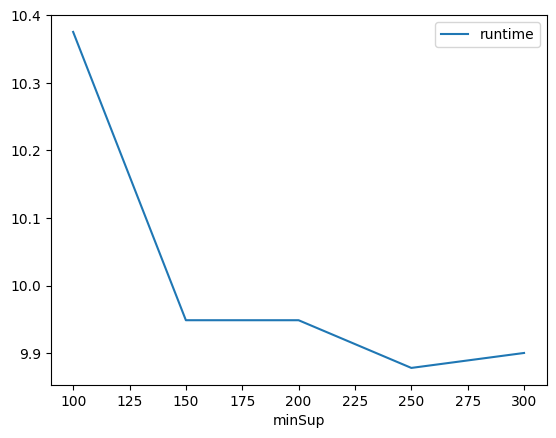

Graph for Runtime taken is successfully generated!


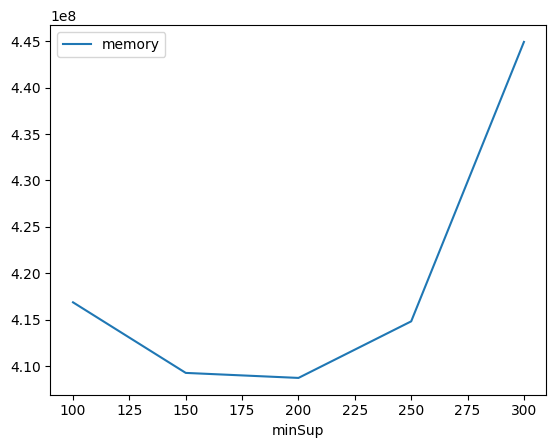

Graph for memory consumption is successfully generated!


In [23]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [24]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
